# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [1]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=f57fcbb7d651ef4e3cf2edf87eb338d6c372401b66e094f25bd5d9226cf70bf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-qpx5lccp/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
# Do not change this code
!gdown "https://drive.google.com/uc?export=download&id=1jSiS-2Wy0AaOg7F7trgAG-KtnVGm2oTb" -O /tmp/train.zip
!gdown "https://drive.google.com/uc?export=download&id=17zP0BYyYBqCgSpYqXjYhikjBVpkxmq8k" -O /tmp/validation.zip
!gdown "https://drive.google.com/uc?export=download&id=17TzNBWdjWGgVRyy7cHMzFWrOXvIhRz6m" -O /tmp/test.zip

Downloading...
From: https://drive.google.com/uc?export=download&id=1jSiS-2Wy0AaOg7F7trgAG-KtnVGm2oTb
To: /tmp/train.zip
100% 144M/144M [00:03<00:00, 38.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=17zP0BYyYBqCgSpYqXjYhikjBVpkxmq8k
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?export=download&id=17TzNBWdjWGgVRyy7cHMzFWrOXvIhRz6m
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 124MB/s] 


In [4]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
       rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
       rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TARGET_SIZE = (244, 244)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,  
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,  
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data. 

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [7]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 100x100 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 121, 121, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 59, 59, 64)        0

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [10]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/20
9/9 [==============================] - 36s 2s/step - loss: 2.3958 - accuracy: 0.3124 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 2/20
9/9 [==============================] - 20s 2s/step - loss: 1.0978 - accuracy: 0.3346 - val_loss: 1.0977 - val_accuracy: 0.3383
Epoch 3/20
9/9 [==============================] - 20s 2s/step - loss: 1.1045 - accuracy: 0.3337 - val_loss: 1.0992 - val_accuracy: 0.3308
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 1.0992 - accuracy: 0.3337 - val_loss: 1.0989 - val_accuracy: 0.3308
Epoch 5/20
9/9 [==============================] - 20s 2s/step - loss: 1.0981 - accuracy: 0.3327 - val_loss: 1.0985 - val_accuracy: 0.3383
Epoch 6/20
9/9 [==============================] - 20s 2s/step - loss: 1.0977 - accuracy: 0.4023 - val_loss: 1.0985 - val_accuracy: 0.3383
Epoch 7/20
9/9 [==============================] - 20s 2s/step - loss: 1.0961 - accuracy: 0.3820 - val_loss: 1.0971 - val_accuracy: 0.3609
Epoch 8/20
9/9 [==================

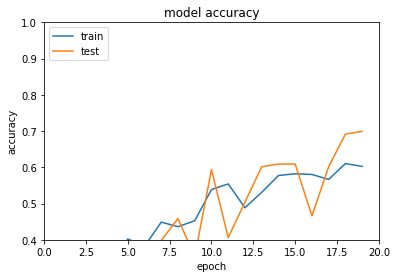

In [11]:
NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator, 
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()